In [252]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [396]:
#Load data
df_raw = pd.read_excel('pqmt2.xlsx')

In [397]:
df_raw.head()

,Evaluation ID,Status,Visit #:,Administrative Requirements,Program workscope is submitted on time and approved,Program budget is submitted on time and approved,Program reports are submitted on time,Program has provided accurate and up-to-date contact information,Program enters data into DYCD MIS systems on time and accurately,Program meets licensing requirements,...,"Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)",Offers activities or workshops that address gender and social roles,Provides health/nutrition instruction,Provides individual/family counseling,"Provides activities, services, or workshops related to improving social and emotional skills",Overall Rating for Program Content,Site Summary,Overall Rating for Site Summary,Program Manager ID,Supervisor ID
0,11604,Approved,1.0,*,Yes,Yes,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,Good,*,Good,632.0,630.0
1,11912,Approved,1.0,*,Yes,Yes,Yes,Yes,Yes,Inc,...,N/O,N/O,N/O,N/O,Good,Fair,*,Fair,660.0,583.0
2,11919,Draft,NaN,*,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,*,NaN,NaN,NaN
3,11923,Approved,1.0,*,Yes,Yes,Yes,Yes,Yes,Yes,...,N/O,N/O,N/O,N/O,N/O,Good,*,Good,624.0,342.0
4,11924,Approved,1.0,*,Yes,Yes,NaN,Yes,Yes,Inc,...,NaN,NaN,NaN,NaN,Fair,Good,*,Fair,633.0,584.0


In [400]:
#Select only approved evaluations
df_raw = df_raw[df_raw['Status'] == 'Approved']

In [405]:
df_raw.shape

(1749, 101)

There are 1749 approved evaluations, with 101 separate indicators, ratings, or information areas.

In [401]:
#Examine columns
i=0
for x in df_raw.columns:
    print(i, x)
    i += 1

0 Evaluation ID
1 Status
2 Visit #:
3 Administrative Requirements
4 Program workscope is submitted on time and approved
5 Program budget is submitted on time and approved
6 Program reports are submitted on time
7 Program has provided accurate and up-to-date contact information
8 Program enters data into DYCD MIS systems on time and accurately
9 Program meets licensing requirements
10 Program has a staff handbook that describes internal policies and procedures
11 Program maintains a record of incident reports
12 Program maintains a log of required fire/safety drills
13 Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files
14 Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations
15 Program maintains a written agreement and/or lease agreement between the provider/program and the h

## Data Discussion
Data comes from site visit evaluations for NYC DYCD-funded after-school youth programs during FY2017. Evaluators respond to 80 indicators related to program administration, compliance, practices, and outputs, then give section and overall ratings. Most indicators are self-explanatory. ROP is the Rate of Participation by youth, which is the primary output measure. Indicators in the Program Content section are sparsely populated because only a subset of activity types will be observed during a single site visit.

## Responses
| Response | Note |
|---|---|
| Yes | Standard is met for indicator |
| PTL | Partial standard is met |
| Inc | Incomplete (similar to PTL) |
| No | Standard is not met |
| N/A | Indicator is not applicable for this program |
| N/O | Indicator was not observed during visit |
| (Ratings) | Excellent, Good, Fair, Poor, Unsatisfactory |




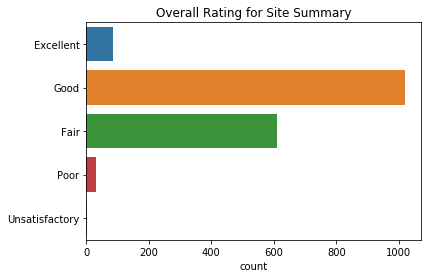

In [402]:
sns.countplot(y='Overall Rating for Site Summary', data=df_raw, order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory']);
plt.title('Overall Rating for Site Summary');
plt.ylabel('');

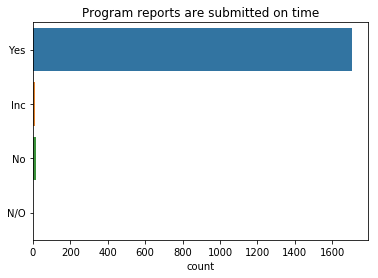

In [403]:
sns.countplot(y='Program reports are submitted on time', data=df_raw, order=['Yes', 'Inc', 'No', 'N/O']);
plt.title('Program reports are submitted on time');
plt.ylabel('');

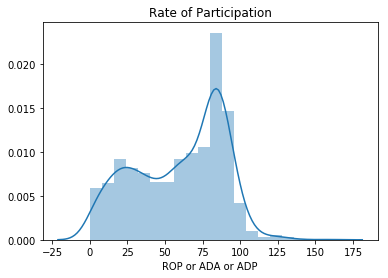

In [506]:
sns.distplot(df_raw['ROP or ADA or ADP'].dropna());
plt.title('Rate of Participation');

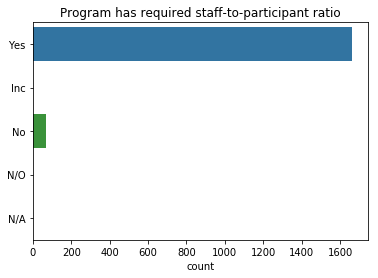

In [407]:
sns.countplot(y='Program has required staff-to-participant ratio', data=df_raw, order=['Yes', 'Inc', 'No', 'N/O', 'N/A']);
plt.title('Program has required staff-to-participant ratio');
plt.ylabel('');

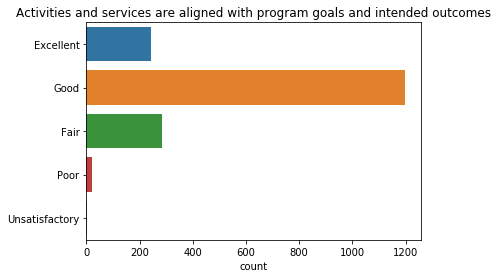

In [408]:
sns.countplot(y='Activities and services are aligned with program goals and intended outcomes', data=df_raw, 
              order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory']);
plt.ylabel('');
plt.title('Activities and services are aligned with program goals and intended outcomes');

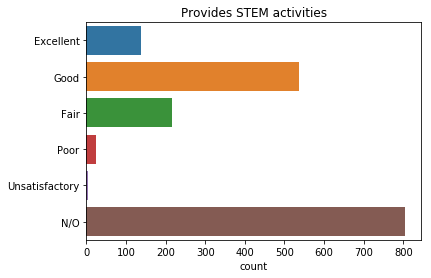

In [409]:
sns.countplot(y='Provides STEM activities', data=df_raw, order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory', 'N/O']);
plt.ylabel('');
plt.title('Provides STEM activities');

In [256]:
#Identify columns to drop. Dropping columns that do not include indicators, ratings, or Visit #
#cols = [i for i in range(0, 28)]
#cols2 = [i for i in range(29, 32)]
#cols3 = [i for i in range(38, 41)]
#cols4 = [i for i in range(133, 255)]
#cols = cols + cols2 + cols3 + cols4

In [410]:
df = df_raw.drop('Status', axis=1)

In [411]:
df.head()

,Evaluation ID,Visit #:,Administrative Requirements,Program workscope is submitted on time and approved,Program budget is submitted on time and approved,Program reports are submitted on time,Program has provided accurate and up-to-date contact information,Program enters data into DYCD MIS systems on time and accurately,Program meets licensing requirements,Program has a staff handbook that describes internal policies and procedures,...,"Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)",Offers activities or workshops that address gender and social roles,Provides health/nutrition instruction,Provides individual/family counseling,"Provides activities, services, or workshops related to improving social and emotional skills",Overall Rating for Program Content,Site Summary,Overall Rating for Site Summary,Program Manager ID,Supervisor ID
0,11604,1.0,*,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,Good,*,Good,632.0,630.0
1,11912,1.0,*,Yes,Yes,Yes,Yes,Yes,Inc,Yes,...,N/O,N/O,N/O,N/O,Good,Fair,*,Fair,660.0,583.0
3,11923,1.0,*,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,N/O,N/O,N/O,N/O,N/O,Good,*,Good,624.0,342.0
4,11924,1.0,*,Yes,Yes,NaN,Yes,Yes,Inc,Yes,...,NaN,NaN,NaN,NaN,Fair,Good,*,Fair,633.0,584.0
5,11922,1.0,*,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,N/O,N/O,N/O,N/O,N/O,Good,*,Good,636.0,402.0


In [412]:
#Examine values
for x in df.columns:
    print(df.groupby([x]).size())

Evaluation ID
11604    1
11646    1
11647    1
11648    1
11649    1
11650    1
11651    1
11652    1
11653    1
11654    1
11655    1
11656    1
11657    1
11658    1
11659    1
11660    1
11661    1
11662    1
11664    1
11665    1
11666    1
11667    1
11668    1
11669    1
11670    1
11671    1
11672    1
11673    1
11674    1
11675    1
        ..
16301    1
16304    1
16314    1
16317    1
16318    1
16325    1
16333    1
16334    1
16336    1
16356    1
16378    1
16382    1
16384    1
16408    1
16419    1
16424    1
16431    1
16469    1
16518    1
16713    1
16897    1
16929    1
16942    1
16948    1
16959    1
16960    1
17043    1
17052    1
17064    1
17082    1
Length: 1749, dtype: int64
Visit #:
1.0    850
2.0    781
3.0    101
4.0      1
dtype: int64
Administrative Requirements
*    1749
dtype: int64
Program workscope is submitted on time and approved
Inc       2
No       14
Yes    1727
dtype: int64
Program budget is submitted on time and approved
Inc       3
No       

The vast majority of Y/N indicators receive a Yes response. The majority of five-point ratings are given as a Good

In [413]:
#Replace inapplicable text with NaN
df.replace({'N/A': np.nan, 'N/O': np.nan, '*': np.nan}, inplace=True)

In [414]:
#Examine missing values by column
for x in df.columns:
    print(x, df[x].isnull().sum())

Evaluation ID 0
Visit #: 16
Administrative Requirements 1749
Program workscope is submitted on time and approved 6
Program budget is submitted on time and approved 4
Program reports are submitted on time 17
Program has provided accurate and up-to-date contact information 2
Program enters data into DYCD MIS systems on time and accurately 5
Program meets licensing requirements 64
Program has a staff handbook that describes internal policies and procedures 6
Program maintains a record of incident reports 4
Program maintains a log of required fire/safety drills 4
Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files 7
Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations 9
Program maintains a written agreement and/or lease agreement between the provider/program and the host facilit

In [415]:
#Drop any row missing Overall Rating
df.dropna(axis=0, how='any', subset=['Overall Rating for Site Summary'], inplace=True)

In [420]:
#subset sparse activity columns
act_cols = ['Provides homework help', 'Provides academic enrichment activities', 'Provides literacy activities', 
            'Provides STEM activities', 'Provides arts-related activities', 'Provides organized sports activities',
            'Provides recreation activities', 'Provides community engagement/service learning activities', 
            'Provides leadership development opportunities', 'Provides assistance in the transition to high school', 
            'Provides assistance in accessing college and college readiness services', 
            'Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)',
            'Offers activities or workshops that address gender and social roles', 'Provides health/nutrition instruction', 
            'Provides individual/family counseling', 'Provides activities, services, or workshops related to improving social and emotional skills']


In [424]:
#Create average activtiy ratings per site
df['Avg_act'] = df[act_cols].replace({'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0}
                                    ).mean(axis=1, numeric_only=True)


In [425]:
df['Avg_act'].head()

0    0.833333
1    0.666667
3    0.666667
4    0.625000
5    0.916667
Name: Avg_act, dtype: float64

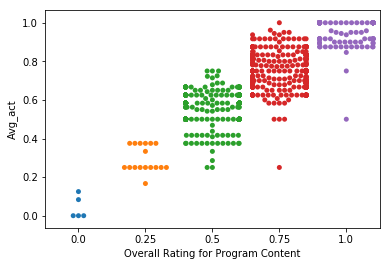

In [426]:
#Create dummies of whether each activity was observed
for i in df[act_cols].columns:
    colname = i + '_dum'
    dums = pd.get_dummies(df[i])
    dums = dums.sum(axis=1)
    df[colname] = dums
    
#Check fitness of new feature
sns.swarmplot(df['Overall Rating for Program Content'].replace(
    {'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0}), df['Avg_act'])

Program content ratings were often too sparse to be useful, because only a few of the activity types would be observed on a particular visit. The average activity rating is calculated from the mean of ratings in the Program Content section. This average closely follows the section rating chosen by the evaluator. To be examined later: Program sites whose average activity ratings are far different from the Program Content section rating.

In [429]:
#Examine nulls in columns
for x in df.columns:
    print(df[x].isnull().sum(), x)

0 Evaluation ID
16 Visit #:
1749 Administrative Requirements
6 Program workscope is submitted on time and approved
4 Program budget is submitted on time and approved
17 Program reports are submitted on time
2 Program has provided accurate and up-to-date contact information
5 Program enters data into DYCD MIS systems on time and accurately
64 Program meets licensing requirements
6 Program has a staff handbook that describes internal policies and procedures
4 Program maintains a record of incident reports
4 Program maintains a log of required fire/safety drills
7 Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files
9 Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations
204 Program maintains a written agreement and/or lease agreement between the provider/program and the host fac

In [428]:
df.head()

,Evaluation ID,Visit #:,Administrative Requirements,Program workscope is submitted on time and approved,Program budget is submitted on time and approved,Program reports are submitted on time,Program has provided accurate and up-to-date contact information,Program enters data into DYCD MIS systems on time and accurately,Program meets licensing requirements,Program has a staff handbook that describes internal policies and procedures,...,Provides recreation activities_dum,Provides community engagement/service learning activities_dum,Provides leadership development opportunities_dum,Provides assistance in the transition to high school_dum,Provides assistance in accessing college and college readiness services_dum,"Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)_dum",Offers activities or workshops that address gender and social roles_dum,Provides health/nutrition instruction_dum,Provides individual/family counseling_dum,"Provides activities, services, or workshops related to improving social and emotional skills_dum"
0,11604,1.0,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,0,0,0,0,0,0
1,11912,1.0,NaN,Yes,Yes,Yes,Yes,Yes,Inc,Yes,...,0,0,0,0,0,0,0,0,0,1
3,11923,1.0,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
4,11924,1.0,NaN,Yes,Yes,NaN,Yes,Yes,Inc,Yes,...,0,0,0,0,0,0,0,0,0,1
5,11922,1.0,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,0,0,0,0,0,0


In [443]:
#drop columns with more than 50 nulls
df.dropna(axis=1, thresh=50, inplace=True)

In [441]:
df['Program meets licensing requirements'].isnull().sum()

64

In [445]:
#Examine nulls in columns
to_drop = []
for x in df.columns:
    print(df[x].isnull().sum(), x)
    if df[x].isnull().sum() > 50:
        to_drop.append(x)

0 Evaluation ID
16 Visit #:
6 Program workscope is submitted on time and approved
4 Program budget is submitted on time and approved
17 Program reports are submitted on time
2 Program has provided accurate and up-to-date contact information
5 Program enters data into DYCD MIS systems on time and accurately
64 Program meets licensing requirements
6 Program has a staff handbook that describes internal policies and procedures
4 Program maintains a record of incident reports
4 Program maintains a log of required fire/safety drills
7 Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files
9 Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations
204 Program maintains a written agreement and/or lease agreement between the provider/program and the host facility (e.g., MOU, SPM)
15 ROP or 

In [448]:
df.drop(to_drop, axis=1, inplace=True)

In [431]:
df.drop('Specify meals provided', axis=1, inplace=True)

In [454]:
df.isnull().sum(axis=0).value_counts()

0     25
2      9
1      7
4      7
3      6
6      5
5      4
7      3
16     3
13     2
9      2
10     1
49     1
48     1
17     1
19     1
20     1
21     1
22     1
23     1
31     1
44     1
15     1
dtype: int64

In [453]:
#Examine missing values by row
df.isnull().sum(axis=1).value_counts()

0     1369
1      299
2       51
3       15
4        6
5        3
12       2
6        2
23       1
9        1
dtype: int64

In [455]:
#Remove targets
section_cols = ['Overall Rating for Administrative Requirements', 'Overall Rating for Safety and  Facility',
 'Overall Rating for Leadership and Management Practices',
 'Overall Rating for Partnerships and Relationships',
 'Overall Rating for Program Design',
 'Overall Rating for Program Content',
 'Overall Rating for Site Summary']
sections = df[section_cols]
df.drop(df[section_cols], axis=1, inplace=True)

In [456]:
#Replace with numerical values
df.replace({'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0, 
            'Yes': 1, 'PTL': .5, 'Inc': .5, 'No': 0}, inplace=True)


In [457]:
#Fill remaining NaNs with median value
df = df.apply(lambda x: x.fillna(x.median()))

In [458]:
df.shape

(1749, 78)

In [459]:
df.describe()

,Evaluation ID,Visit #:,Program workscope is submitted on time and approved,Program budget is submitted on time and approved,Program reports are submitted on time,Program has provided accurate and up-to-date contact information,Program enters data into DYCD MIS systems on time and accurately,Program has a staff handbook that describes internal policies and procedures,Program maintains a record of incident reports,Program maintains a log of required fire/safety drills,...,Provides recreation activities_dum,Provides community engagement/service learning activities_dum,Provides leadership development opportunities_dum,Provides assistance in the transition to high school_dum,Provides assistance in accessing college and college readiness services_dum,"Provides assistance in locating job and/or training opportunities and services (e.g., employment/career counseling, job training)_dum",Offers activities or workshops that address gender and social roles_dum,Provides health/nutrition instruction_dum,Provides individual/family counseling_dum,"Provides activities, services, or workshops related to improving social and emotional skills_dum"
count,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,...,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000
mean,14084.301315,1.572899,0.991424,0.987707,0.987421,0.929674,0.804174,0.997141,0.982847,0.950257,...,0.279588,0.107490,0.388222,0.012579,0.009720,0.008005,0.086335,0.099485,0.020011,0.225272
std,1406.017834,0.603174,0.090673,0.108257,0.103495,0.231093,0.359713,0.047751,0.120747,0.189351,...,0.448925,0.309824,0.487485,0.111479,0.098137,0.089135,0.280938,0.299398,0.140079,0.417881
min,11604.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12847.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14205.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15308.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17082.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [460]:
#Create and plot correlation matrix
corr_mat = df.corr()

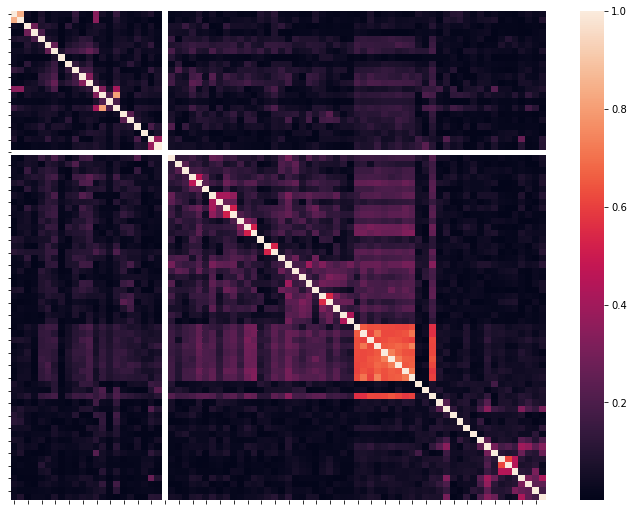

In [461]:
plt.figure(num=1, figsize=(12, 9));
ax = sns.heatmap(np.absolute(corr_mat));
ax.set_yticklabels([]);
ax.set_xticklabels([]);

In [462]:
a_corr_mat = np.absolute(corr_mat)
s = a_corr_mat.unstack()
so = s.sort_values(kind='quicksort', ascending=False)

In [469]:
so[77:107]

Evaluation ID                                                                                                                      Visit #:                                                                                                                             0.841792
Visit #:                                                                                                                           Evaluation ID                                                                                                                        0.841792
# of Participants Present at Visit                                                                                                 # of Contracted Participants (or Service Level)                                                                                      0.809954
# of Contracted Participants (or Service Level)                                                                                    # of Participants Present at Visit                

Number of participants contracted is highly correlated with number of participants present on day of site visit. Activity observations, particularly those that are thematically related, are highly correlated with each other.

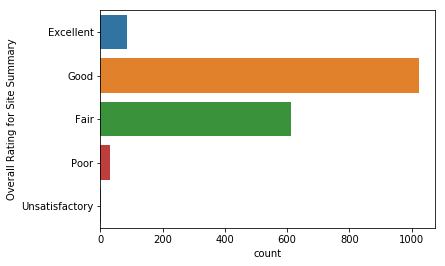

In [326]:
sns.countplot(y='Overall Rating for Site Summary', data=sections, order=['Excellent', 'Good', 'Fair', 'Poor', 'Unsatisfactory'])

A majority of site visit ratings are 'Good' and most of the remaining ratings are 'Fair'.

## Discussion
Numerical values are estimated for categorical rating choices. Section and overall ratings are intended to be determined by the indicator responses. 

Average activity observation score is calculated as an attempt to deal with sparse data. The assumption is that program content section rating is based on the aggregate of activities observed. Plotting indicates this to be a good proxy. There is also a hypothesis that the particular activities observed on a visit (and not just their quality) have an effect on the overall rating.

## Next Steps
Next steps include splitting the data and evaluating a series of models for appropriate model and parameters.

In [470]:
smat = sections.replace({'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0}).corr()

In [314]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
news = sections.replace({'Excellent': 1, 'Good': .75, 'Fair': .5, 'Poor': .25, 'Unsatisfactory': 0}).dropna()
sX = news.drop('Overall Rating for Site Summary', axis=1)
sy = news['Overall Rating for Site Summary']
lr.fit(sX,sy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

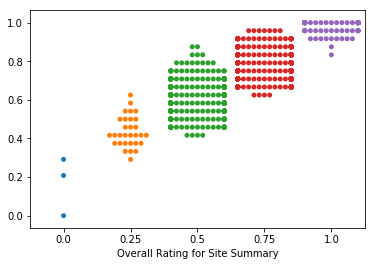

In [471]:
pred=sX.mean(axis=1)
sns.swarmplot(sy, pred)

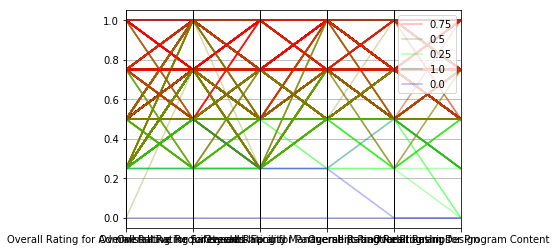

In [331]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(news, 'Overall Rating for Site Summary', color=[[1,0,0,0.3],[.5,.5,0,0.3],[0,1,0,0.3],[0,.5,.5,0.3],[0,0,1,0.3]])

## Beginnings of next steps

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [472]:
y = sections['Overall Rating for Site Summary']

In [473]:
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [474]:
dtc = DecisionTreeClassifier()
params = {
    'max_depth': [i for i in range(1,80)],
    'min_samples_leaf': [i for i in range(1,20)]
}

In [475]:
grid = GridSearchCV(dtc, param_grid=params)

In [476]:
y_train.replace({0: 'Unsatisfactory', .25: 'Poor', .5: 'Fair', .75: 'Good', 1: 'Excellent'}, inplace=True)

In [477]:
y_train.replace({'Unsatisfactory': 'Poor'}, inplace=True)

In [478]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [479]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [480]:
pred_train = grid.predict(X_train)

In [481]:
print(classification_report(y_train, pred_train))

             precision    recall  f1-score   support

  Excellent       0.89      0.89      0.89        61
       Fair       0.96      0.94      0.95       470
       Good       0.96      0.97      0.97       756
       Poor       0.95      0.79      0.86        24

avg / total       0.95      0.95      0.95      1311



In [482]:
print(confusion_matrix(y_train, pred_train))

[[ 54   0   7   0]
 [  2 442  25   1]
 [  5  15 736   0]
 [  0   5   0  19]]


In [484]:
dtc2 = DecisionTreeClassifier(max_depth=13, min_samples_leaf=2)

In [485]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [486]:
dtc2.feature_importances_

array([0.06049786, 0.        , 0.        , 0.        , 0.        ,
       0.00242469, 0.03609827, 0.        , 0.        , 0.00495714,
       0.        , 0.00387951, 0.10147092, 0.02492777, 0.03700072,
       0.05783609, 0.00348886, 0.        , 0.        , 0.        ,
       0.00643246, 0.00298424, 0.        , 0.0092015 , 0.00572893,
       0.01944156, 0.03749588, 0.        , 0.02685773, 0.00336615,
       0.0140636 , 0.01248281, 0.        , 0.        , 0.00411463,
       0.00528044, 0.        , 0.00581327, 0.11471331, 0.00148714,
       0.00363704, 0.        , 0.        , 0.00290938, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00795299, 0.00513345, 0.02559511, 0.00730696, 0.00377727,
       0.00579967, 0.00473954, 0.03578414, 0.0091739 , 0.01360347,
       0.02009698, 0.22179472, 0.        , 0.00317621, 0.00565762,
       0.00728851, 0.00668138, 0.00398093, 0.        , 0.        ,
       0.00386526, 0.        , 0.        , 0.        , 0.     

In [487]:
a=0
for i in X_train.columns:
    print(a,i)
    a += 1

0 Evaluation ID
1 Visit #:
2 Program workscope is submitted on time and approved
3 Program budget is submitted on time and approved
4 Program reports are submitted on time
5 Program has provided accurate and up-to-date contact information
6 Program enters data into DYCD MIS systems on time and accurately
7 Program has a staff handbook that describes internal policies and procedures
8 Program maintains a record of incident reports
9 Program maintains a log of required fire/safety drills
10 Program maintains complete participant files including, as appropriate: registration forms, medical records, consent forms, assessments, case management files
11 Program maintains complete staff personnel files, including, as appropriate: fingerprint records and other clearances, resumes (staff & volunteers), evaluations
12 ROP or ADA or ADP
13 # of Contracted Participants (or Service Level)
14 # of Enrolled (or Validated) Participants
15 # of Participants Present at Visit
16 Space and resources are s

In [488]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=20)

In [489]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [490]:
pred_r = rf.predict(X_train)

In [491]:
print(confusion_matrix(y_train, pred_r))

[[ 61   0   0   0]
 [  0 463   7   0]
 [  0   0 756   0]
 [  0   0   0  24]]


In [492]:
pred_d = dtc2.predict(X_test)

In [493]:
pred_d[:5]

array(['Good', 'Good', 'Excellent', 'Fair', 'Fair'], dtype=object)

In [494]:
pred_r = rf.predict(X_test)

In [495]:
print(confusion_matrix(y_test.replace({0: 'Poor', .25: 'Poor', .5: 'Fair', .75: 'Good', 1: 'Excellent'}), pred_d))

[[ 17   0   8   0]
 [  1 107  29   2]
 [  3  54 208   0]
 [  0   7   2   0]]


In [496]:
print(confusion_matrix(y_test.replace({0: 'Poor', .25: 'Poor', .5: 'Fair', .75: 'Good', 1: 'Excellent'}), pred_r))

[[ 14   0  11   0]
 [  1 111  27   0]
 [  3  25 237   0]
 [  0   9   0   0]]


In [499]:
print(classification_report(y_test.replace({0: 'Poor', .25: 'Poor', .5: 'Fair', .75: 'Good', 1: 'Excellent'}), pred_d))

             precision    recall  f1-score   support

  Excellent       0.81      0.68      0.74        25
       Fair       0.64      0.77      0.70       139
       Good       0.84      0.78      0.81       265
       Poor       0.00      0.00      0.00         9

avg / total       0.76      0.76      0.75       438



In [497]:
print(classification_report(y_test.replace({0: 'Poor', .25: 'Poor', .5: 'Fair', .75: 'Good', 1: 'Excellent'}), pred_r))

             precision    recall  f1-score   support

  Excellent       0.78      0.56      0.65        25
       Fair       0.77      0.80      0.78       139
       Good       0.86      0.89      0.88       265
       Poor       0.00      0.00      0.00         9

avg / total       0.81      0.83      0.82       438



C:\Users\ittrain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [498]:
rf.feature_importances_

array([0.0383405 , 0.0103455 , 0.00105509, 0.00140575, 0.00227823,
       0.006859  , 0.02271827, 0.00034604, 0.00187485, 0.00680446,
       0.00705799, 0.0127068 , 0.06084707, 0.03683195, 0.04591292,
       0.05039808, 0.00266556, 0.00080663, 0.00191751, 0.00158629,
       0.00272399, 0.00519638, 0.        , 0.01039767, 0.00206149,
       0.01444523, 0.01769172, 0.00939372, 0.01542367, 0.0119646 ,
       0.00756388, 0.0156492 , 0.00720849, 0.00151905, 0.00501821,
       0.00608827, 0.0039129 , 0.01973823, 0.06037058, 0.00493696,
       0.01500429, 0.00067042, 0.00122572, 0.00333156, 0.00399644,
       0.00188468, 0.00054754, 0.00096042, 0.00079439, 0.00045278,
       0.03258597, 0.02641585, 0.0275061 , 0.02966941, 0.02829687,
       0.02190685, 0.01615103, 0.02572982, 0.0279863 , 0.02807187,
       0.02234119, 0.07456457, 0.00666716, 0.00553873, 0.00750181,
       0.00711315, 0.00744969, 0.00639795, 0.00639033, 0.00326871,
       0.00752629, 0.00172904, 0.00081182, 0.00069121, 0.00323

In [500]:
a=0
features = []
imp = []
for i in X_train.columns:
    features.append(i)
    imp.append(rf.feature_importances_[a])
    a += 1

In [501]:
feats = pd.DataFrame({'Feature':features, 'Importance':imp})

In [502]:
sort_feats = feats.sort_values(by='Importance', ascending=False)

In [503]:
for i in sort_feats.index:
    print('{:2f}'.format(sort_feats['Importance'][i]), sort_feats['Feature'][i])

0.074565 Avg_act
0.060847 ROP or ADA or ADP
0.060371 Program effectively engages, and retains participants
0.050398 # of Participants Present at Visit
0.045913 # of Enrolled (or Validated) Participants
0.038341 Evaluation ID
0.036832 # of Contracted Participants (or Service Level)
0.032586 Activities and services are aligned with program goals and intended outcomes
0.029669 Activities and services support participants’ physical, social, emotional, educational growth and development
0.028297 Activities and services are appropriate for participant age and skill level
0.028072 Program Manager ID
0.027986 Staff approach to working with participants is individual/family-centered, strength-based, and outcome-driven
0.027506 Activities and services are grounded in effective curricula and lesson plans and are well organized
0.026416 Activities and services are grounded in positive youth development principles
0.025730 Participants' needs, goals, and progress are assessed regularly and inform p